In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9
# le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme
# l’âge (age): l'âge du principal bénéficiaire
# le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance
# smoker : fumeur ou non-fumeur
# région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest
# charges : la prime d’assurance facturée (cible)

# Si l’IMC est :  entre 25,0 et 29,9 kg/m², il existe un surpoids ; 
# entre 30,0 et 34,9 kg/m², il s’agit d’obésité modérée ; entre 35,0 et 39,9 kg/m², 
# il s’agit d’une obésité sévère ; plus de 40 kg/m², on parle d’obésité massive.

df = pd.read_csv('profil_prime.csv')
df.head(25)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [206]:
df.tail(25)

,age,sex,bmi,children,smoker,region,charges
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570


In [207]:
print(df.shape)

# 1338 lignes
# 7 colonnes dont la variable cible (charges)

(1338, 7)


In [208]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [209]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [210]:
df.isnull().sum()
#pas de valeurs null

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

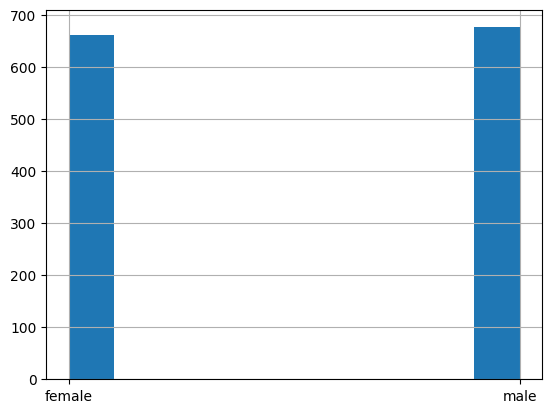

In [211]:
#variable smoker(categorielle)
df['sex'].hist()

#autant de male que de femelle

In [212]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

<Axes: >

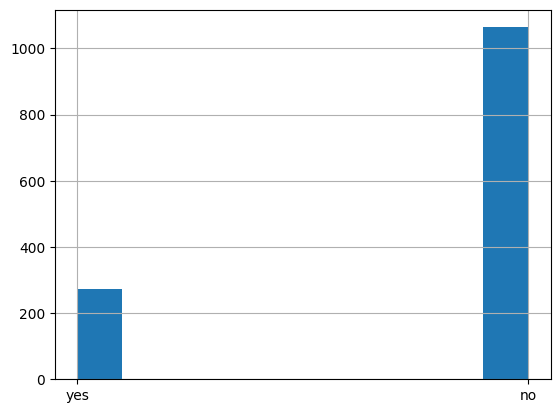

In [213]:
#variable smoker(categorielle)
df['smoker'].hist()

In [214]:
smoker_describe = df['smoker'].describe()
smoker_count = df['smoker'].value_counts()
print(smoker_describe, smoker_count)

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object smoker
no     1064
yes     274
Name: count, dtype: int64


<Axes: >

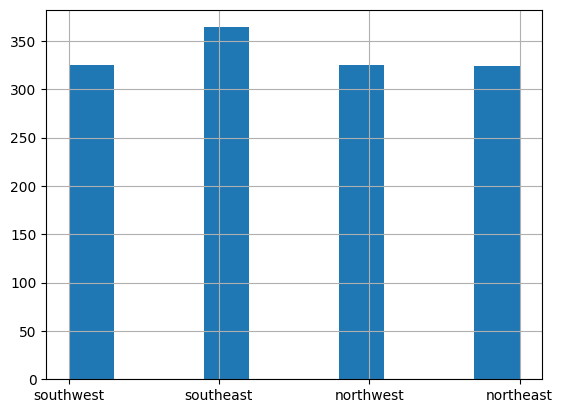

In [215]:
#focus variable region
df['region'].hist()

In [216]:
region_describe = df['region'].describe()
count_region = df['region'].value_counts()

print(region_describe, count_region)



count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [217]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [218]:
#encodage de la colonne sex
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})
df = df.drop('sex', axis = 1)
df.head(10)

,age,bmi,children,smoker,region,charges,sex_encoded
0,19,27.900,0,yes,southwest,16884.92400,1
1,18,33.770,1,no,southeast,1725.55230,0
2,28,33.000,3,no,southeast,4449.46200,0
3,33,22.705,0,no,northwest,21984.47061,0
4,32,28.880,0,no,northwest,3866.85520,0
5,31,25.740,0,no,southeast,3756.62160,1
6,46,33.440,1,no,southeast,8240.58960,1
7,37,27.740,3,no,northwest,7281.50560,1
8,37,29.830,2,no,northeast,6406.41070,0
9,60,25.840,0,no,northwest,28923.13692,1


In [219]:
#encodage de la colonne smoker
df['smoker_encoded'] = df['smoker'].map({'no': 0, 'yes': 1})
df = df.drop('smoker', axis = 1)
df.head(10)

,age,bmi,children,region,charges,sex_encoded,smoker_encoded
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0
5,31,25.740,0,southeast,3756.62160,1,0
6,46,33.440,1,southeast,8240.58960,1,0
7,37,27.740,3,northwest,7281.50560,1,0
8,37,29.830,2,northeast,6406.41070,0,0
9,60,25.840,0,northwest,28923.13692,1,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'sex_encoded'}>,
        <Axes: title={'center': 'smoker_encoded'}>]], dtype=object)

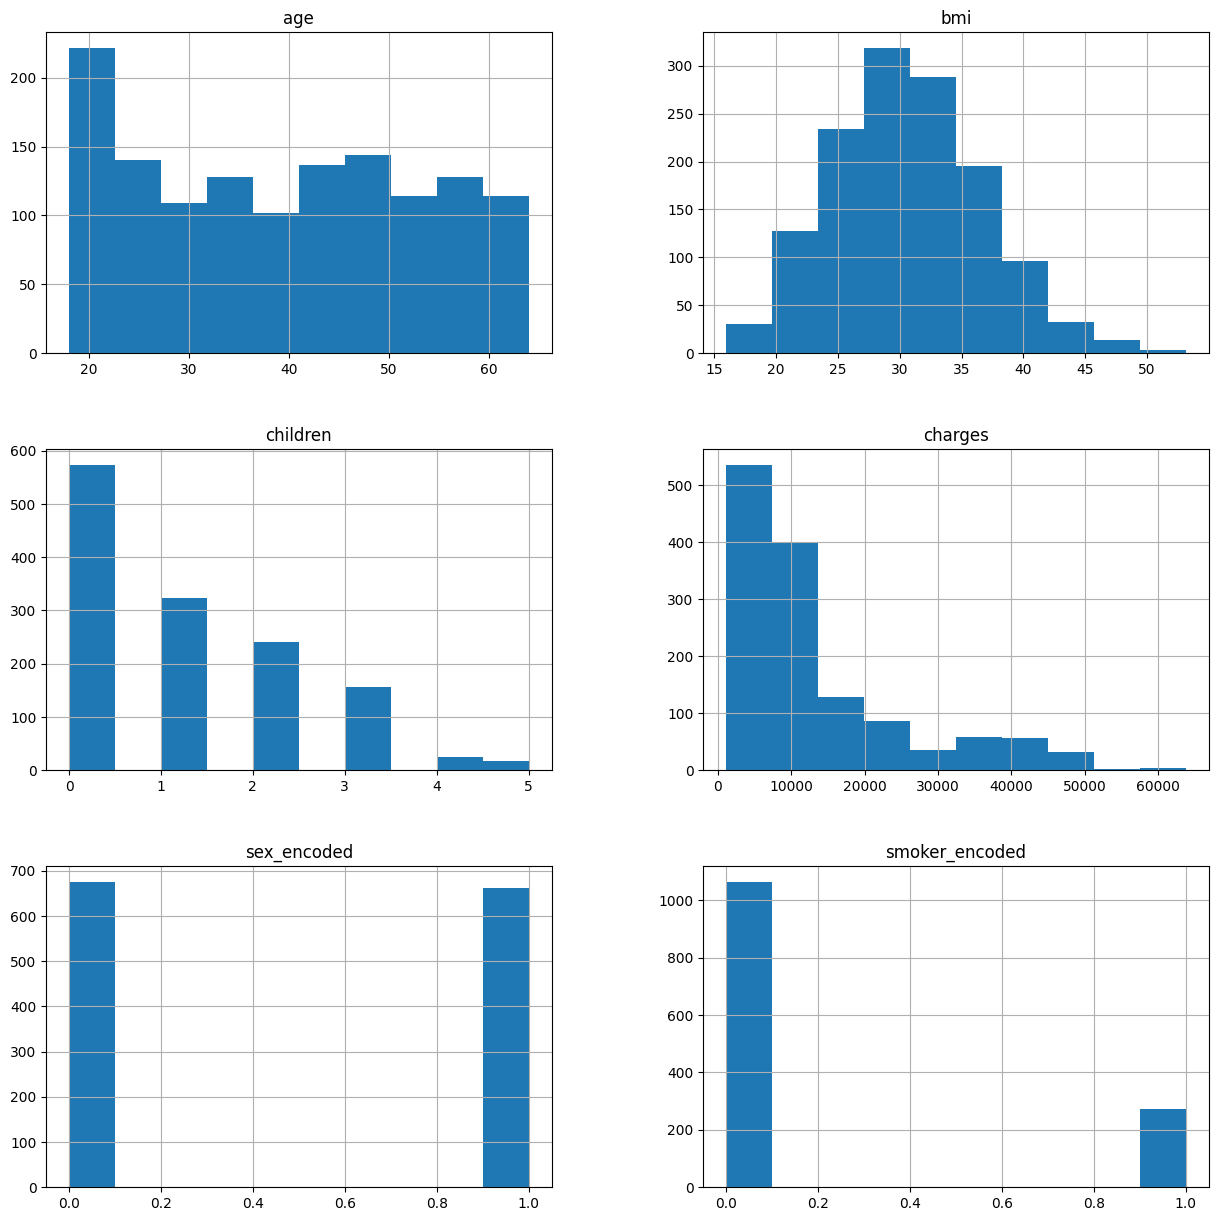

In [220]:
#hist pour avoir une idée de la distribution de nos valeurs
df.hist(figsize = (15,15))

age                  Axes(0.125,0.653529;0.227941x0.226471)
bmi               Axes(0.398529,0.653529;0.227941x0.226471)
children          Axes(0.672059,0.653529;0.227941x0.226471)
charges              Axes(0.125,0.381765;0.227941x0.226471)
sex_encoded       Axes(0.398529,0.381765;0.227941x0.226471)
smoker_encoded    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

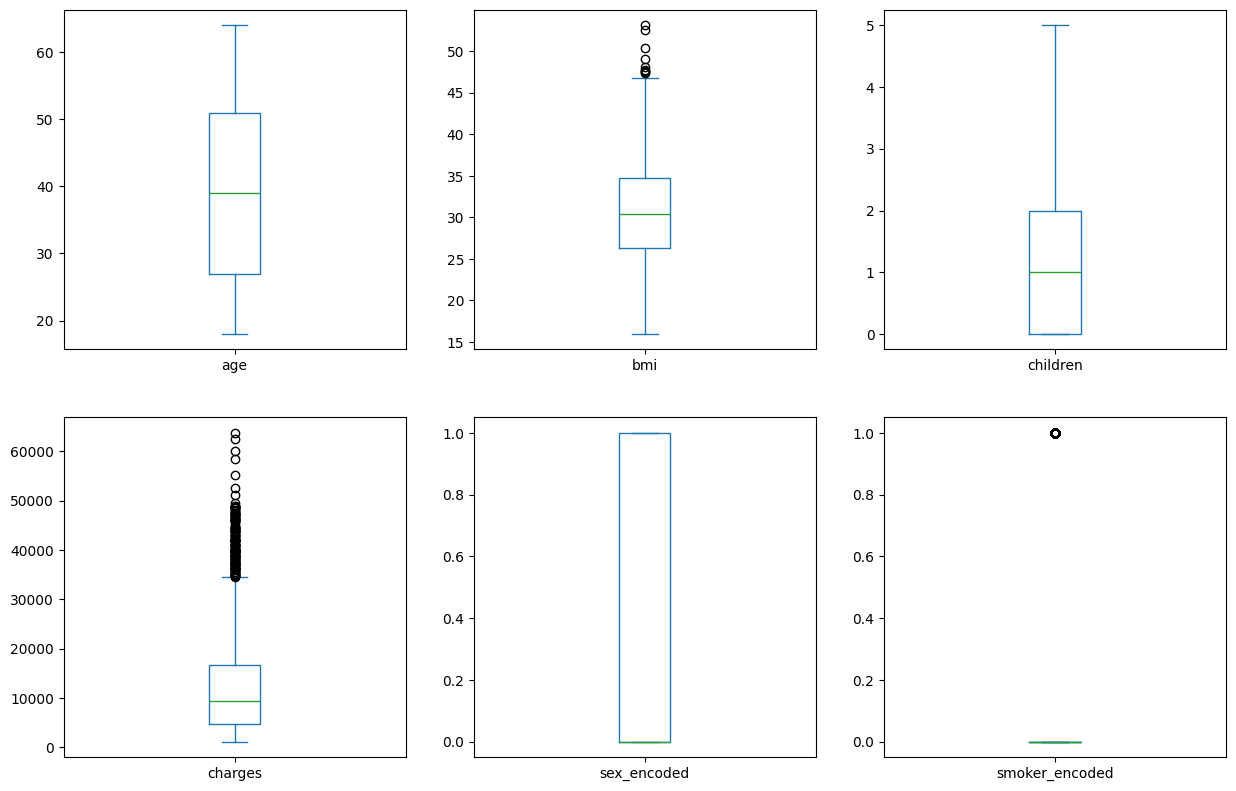

In [221]:
df.plot(kind='box',
          subplots=True,
          layout=(3,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

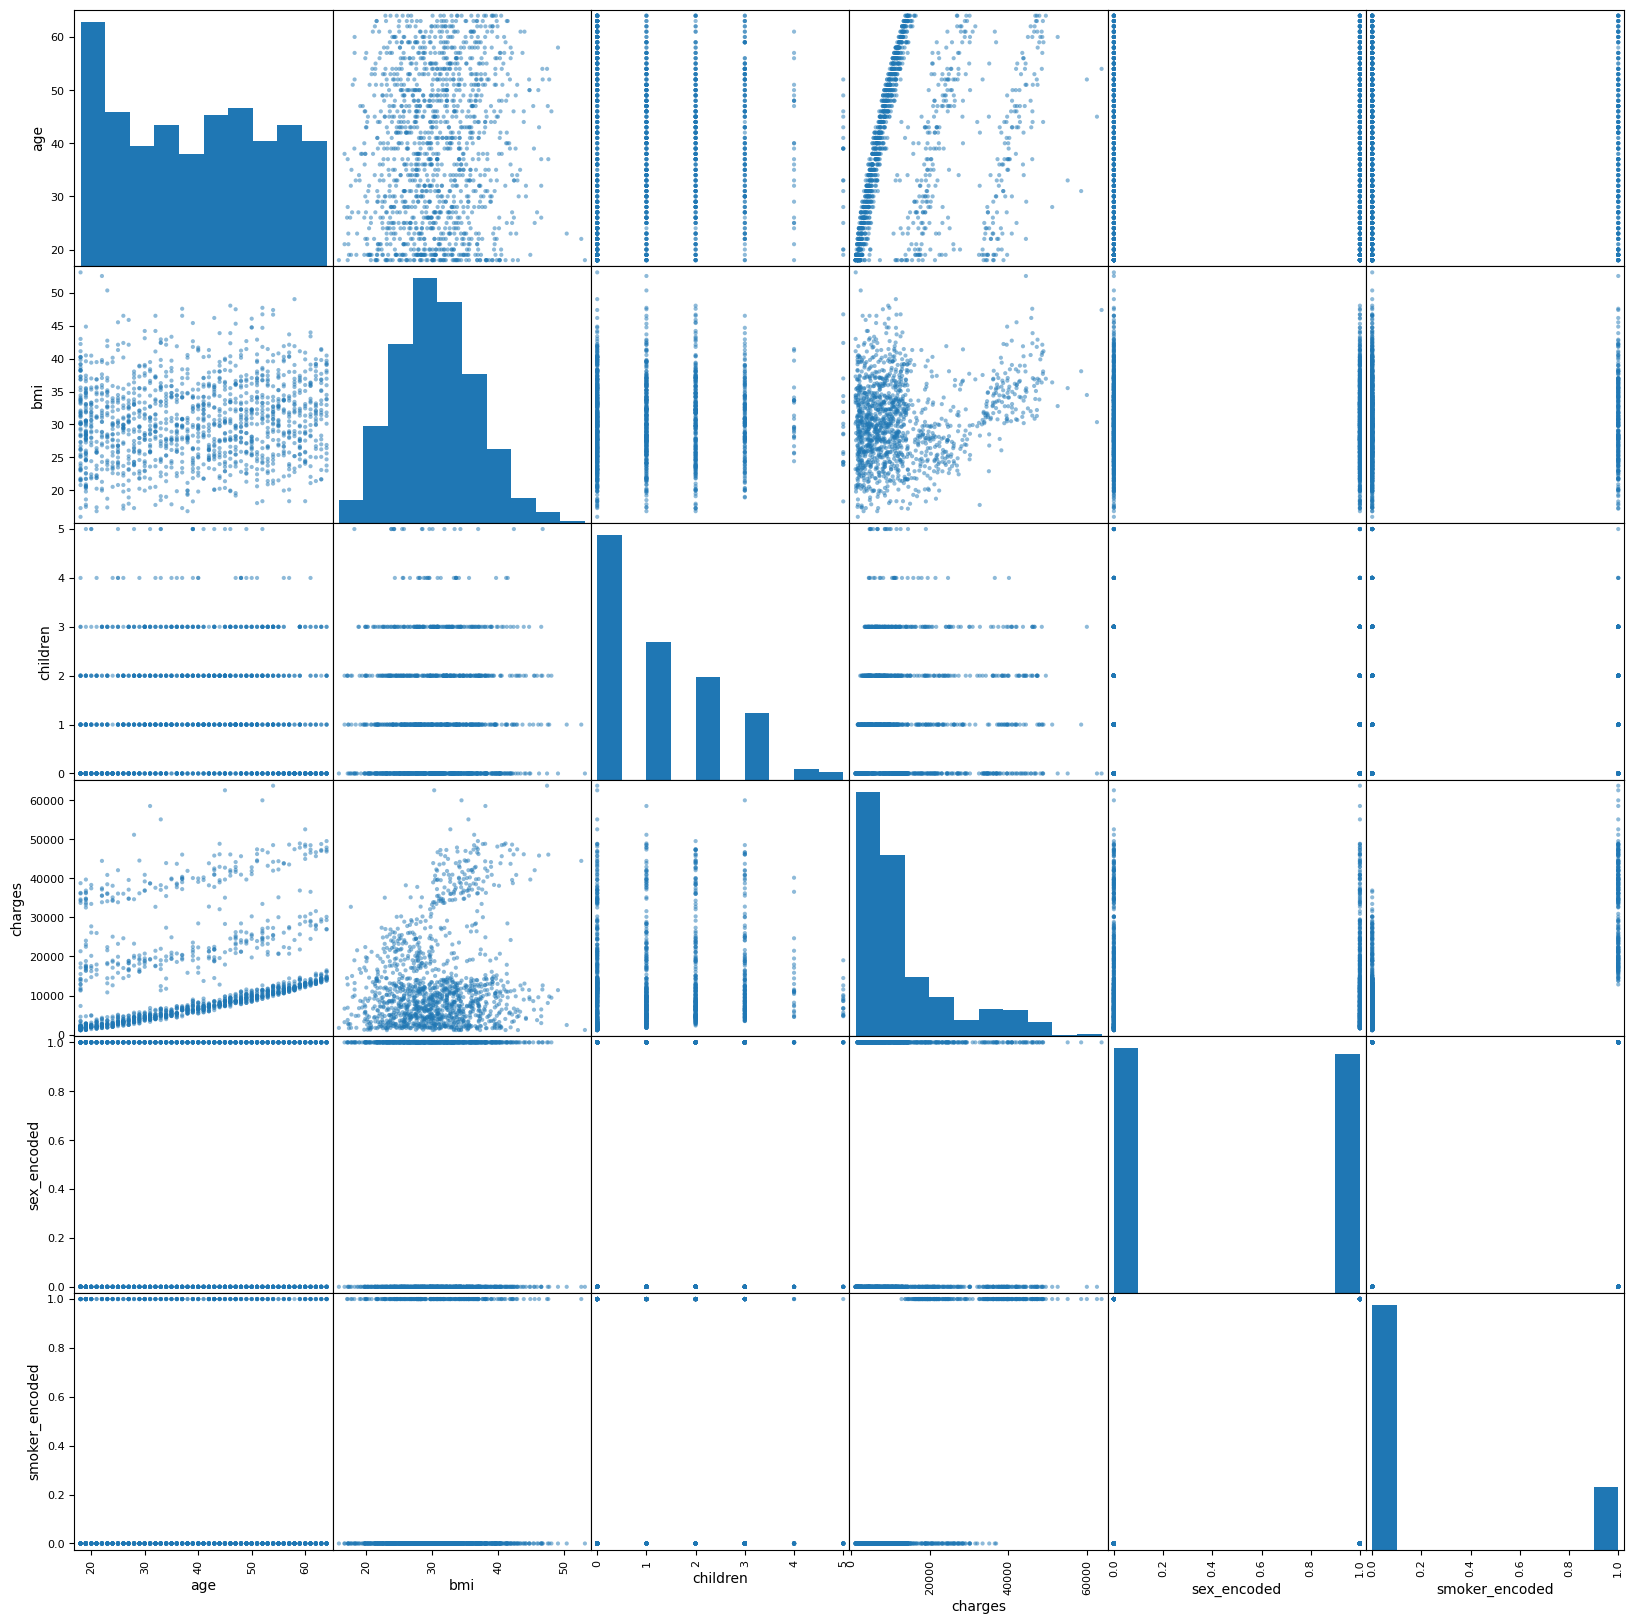

In [222]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20)); #possibilité d'ajouter alpha pour la transparence

Text(0.5, 1.0, 'charges vs smoker_encoded')

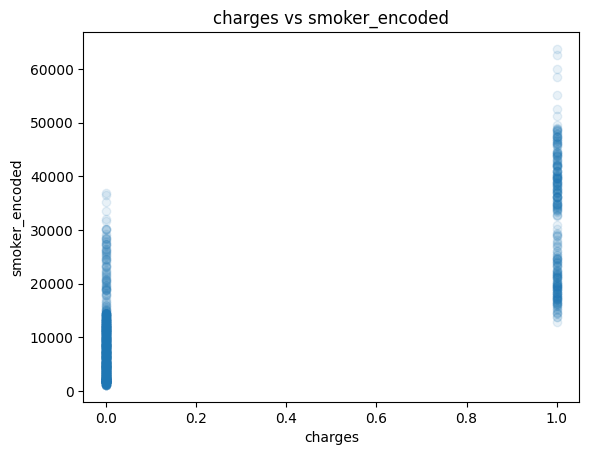

In [235]:
plt.scatter(x=df['smoker_encoded'], y=df['charges'], alpha=0.1)
plt.xlabel('smoker_encoded')
plt.ylabel('charges')
plt.title('smoker_encoded vs charges')

Text(0.5, 1.0, 'charges vs age')

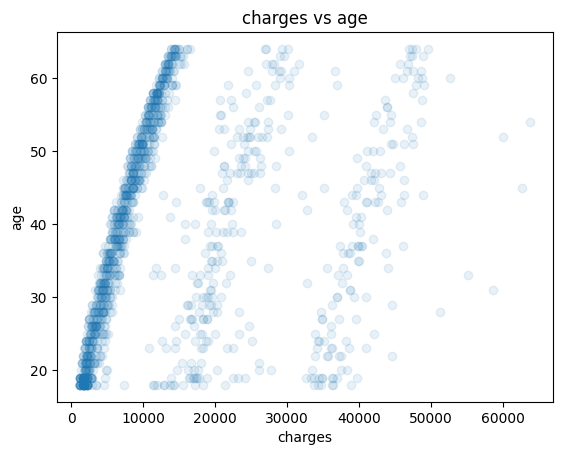

In [236]:
plt.scatter(x=df['charges'], y=df['bmi'], alpha=0.1)
plt.xlabel('charges')
plt.ylabel('age')
plt.title('charges vs age')

In [233]:

df_sans_region = df.drop('region', axis = 1)

print(df_sans_region)

df_sans_region.corr()

      age     bmi  children      charges  sex_encoded  smoker_encoded
0      19  27.900         0  16884.92400            1               1
1      18  33.770         1   1725.55230            0               0
2      28  33.000         3   4449.46200            0               0
3      33  22.705         0  21984.47061            0               0
4      32  28.880         0   3866.85520            0               0
...   ...     ...       ...          ...          ...             ...
1333   50  30.970         3  10600.54830            0               0
1334   18  31.920         0   2205.98080            1               0
1335   18  36.850         0   1629.83350            1               0
1336   21  25.800         0   2007.94500            1               0
1337   61  29.070         0  29141.36030            1               1

[1338 rows x 6 columns]


,age,bmi,children,charges,sex_encoded,smoker_encoded
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251
sex_encoded,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185
smoker_encoded,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000


In [234]:
#corrélations évidentes :

# on note qu'il y a une corrélation entre la charge et smoker
# entre l'age et les charges

# peu évident
# entre bmi et les charges 
# entre bmi et l'age
print(df)

      age     bmi  children     region      charges  sex_encoded  \
0      19  27.900         0  southwest  16884.92400            1   
1      18  33.770         1  southeast   1725.55230            0   
2      28  33.000         3  southeast   4449.46200            0   
3      33  22.705         0  northwest  21984.47061            0   
4      32  28.880         0  northwest   3866.85520            0   
...   ...     ...       ...        ...          ...          ...   
1333   50  30.970         3  northwest  10600.54830            0   
1334   18  31.920         0  northeast   2205.98080            1   
1335   18  36.850         0  southeast   1629.83350            1   
1336   21  25.800         0  southwest   2007.94500            1   
1337   61  29.070         0  northwest  29141.36030            1   

      smoker_encoded  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1333               0  